<a href="https://colab.research.google.com/github/c-tong02/Water-Quality-and-Potability/blob/main/Calidad_y_potabilidad_de_agua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calidad y potabilidad del agua**

# Cargando base de datos

In [ ]:
import numpy as np
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/EdwinEscobedo/Datasets/main/water_potability.csv", sep = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
# Verificar duplicados
duplicados = df.duplicated()

# Contar registros duplicados
num_duplicados = duplicados.sum()
print(num_duplicados)

# Mostrar los registros duplicados (si los hay)
registros_duplicados = df[duplicados]
print(registros_duplicados)

0
Empty DataFrame
Columns: [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []


No tenemos registros duplicados.

In [ ]:
# Obtener la distribución de valores de variable target
distribucion = df["Potability"].value_counts()

# Mostrar la distribución de valores de variable target
print("Distribución de valores:")
print(distribucion)

Distribución de valores:
Potability
0    1998
1    1278
Name: count, dtype: int64


Vemos que los valores de la variable target están desbalanceados.

# Separación de datos en train y test

In [ ]:
X = df.drop('Potability', axis=1)
y = df['Potability']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2293, 9)
(983, 9)
(2293,)
(983,)


In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train = df_train.reset_index(drop=True)
df_test = pd.concat([X_test, y_test], axis=1)
df_test = df_test.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1959 non-null   float64
 1   Hardness         2293 non-null   float64
 2   Solids           2293 non-null   float64
 3   Chloramines      2293 non-null   float64
 4   Sulfate          1759 non-null   float64
 5   Conductivity     2293 non-null   float64
 6   Organic_carbon   2293 non-null   float64
 7   Trihalomethanes  2175 non-null   float64
 8   Turbidity        2293 non-null   float64
 9   Potability       2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


# Preparación de data train

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
def report_missings(data, opt = 0):
  """
  data = dataframe
  opt = opcion de graficar {0: todo, >0 solo faltantes}
        default= 0
  """
  data_rep = round(data.isna().sum().sort_values(ascending=False)/len(data)*100, 3)
  data_rep2 = data.isna().sum().sort_values(ascending=False)
  df = pd.concat([data_rep2, data_rep], axis=1).reset_index()
  df.columns = ["Variable", "Cant. Nulos", "% Nulos"]
  df["Cant. No Nulos"] = len(data) - df["Cant. Nulos"]
  df = df.reindex(columns=["Variable","Cant. No Nulos","Cant. Nulos","% Nulos"])

  print("*"*100)
  print("*"*20, "Reporte General", "*"*20)
  print("*"*100)
  print(df)

  if opt:
    data_rep = data_rep[data_rep > 0] # opcional
  miss = data_rep.to_frame()
  miss.columns = ['Cantidad (%)']
  miss.index.names = ['Variable']
  miss['Variable'] = miss.index

  fig = plt.figure(figsize=(15,15))
  #plot the missing value count
  #plt.figure(figsize=(10,6))
  ax1 = fig.add_subplot(3,2,1)
  print("*"*70, "Graficas de datos faltantes", "*"*70)
  print("*"*180)
  missingno.bar(data, figsize=(10,5), fontsize=12, ax=ax1, color="dodgerblue");
  plt.title("Conteo de muestras para cada variable (porcentaje y cantidad)")

  ax3 = fig.add_subplot(3,2,3)
  sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Valores perdidos'})
  plt.title("Distribución de valores perdidos")
  plt.tight_layout()


  ax2 = fig.add_subplot(3,2,2)
  #sns.set(style="whitegrid", color_codes=True)
  sns.barplot(x = 'Variable', y = 'Cantidad (%)', data=miss, ax=ax2)
  plt.ylim([0,100])
  plt.title("Porcentaje de datos faltantes por variable")
  plt.xticks(rotation = 90)
  #plt.savefig("missing1.png", dpi=100)


  ax4 = fig.add_subplot(3,2,4)
  missingno.heatmap(data, cmap="RdYlGn", figsize=(10,5), fontsize=12, ax=ax4)
  plt.title("Correlación de nulidad entre variables")
  ax5 = fig.add_subplot(3,2,5)
  missingno.dendrogram(data, figsize=(10,5), fontsize=12,ax=ax5)
  plt.title("Dendograma basado en la correlación de valores faltantes")
  plt.tight_layout()


****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
          Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0          Sulfate            1759          534   23.288
1               ph            1959          334   14.566
2  Trihalomethanes            2175          118    5.146
3         Hardness            2293            0    0.000
4           Solids            2293            0    0.000
5      Chloramines            2293            0    0.000
6     Conductivity            2293            0    0.000
7   Organic_carbon            2293            0    0.000
8        Turbidity            2293            0    0.000
9       Potability            2293            0    0.000
********************************************************************** Graficas de datos faltantes **************

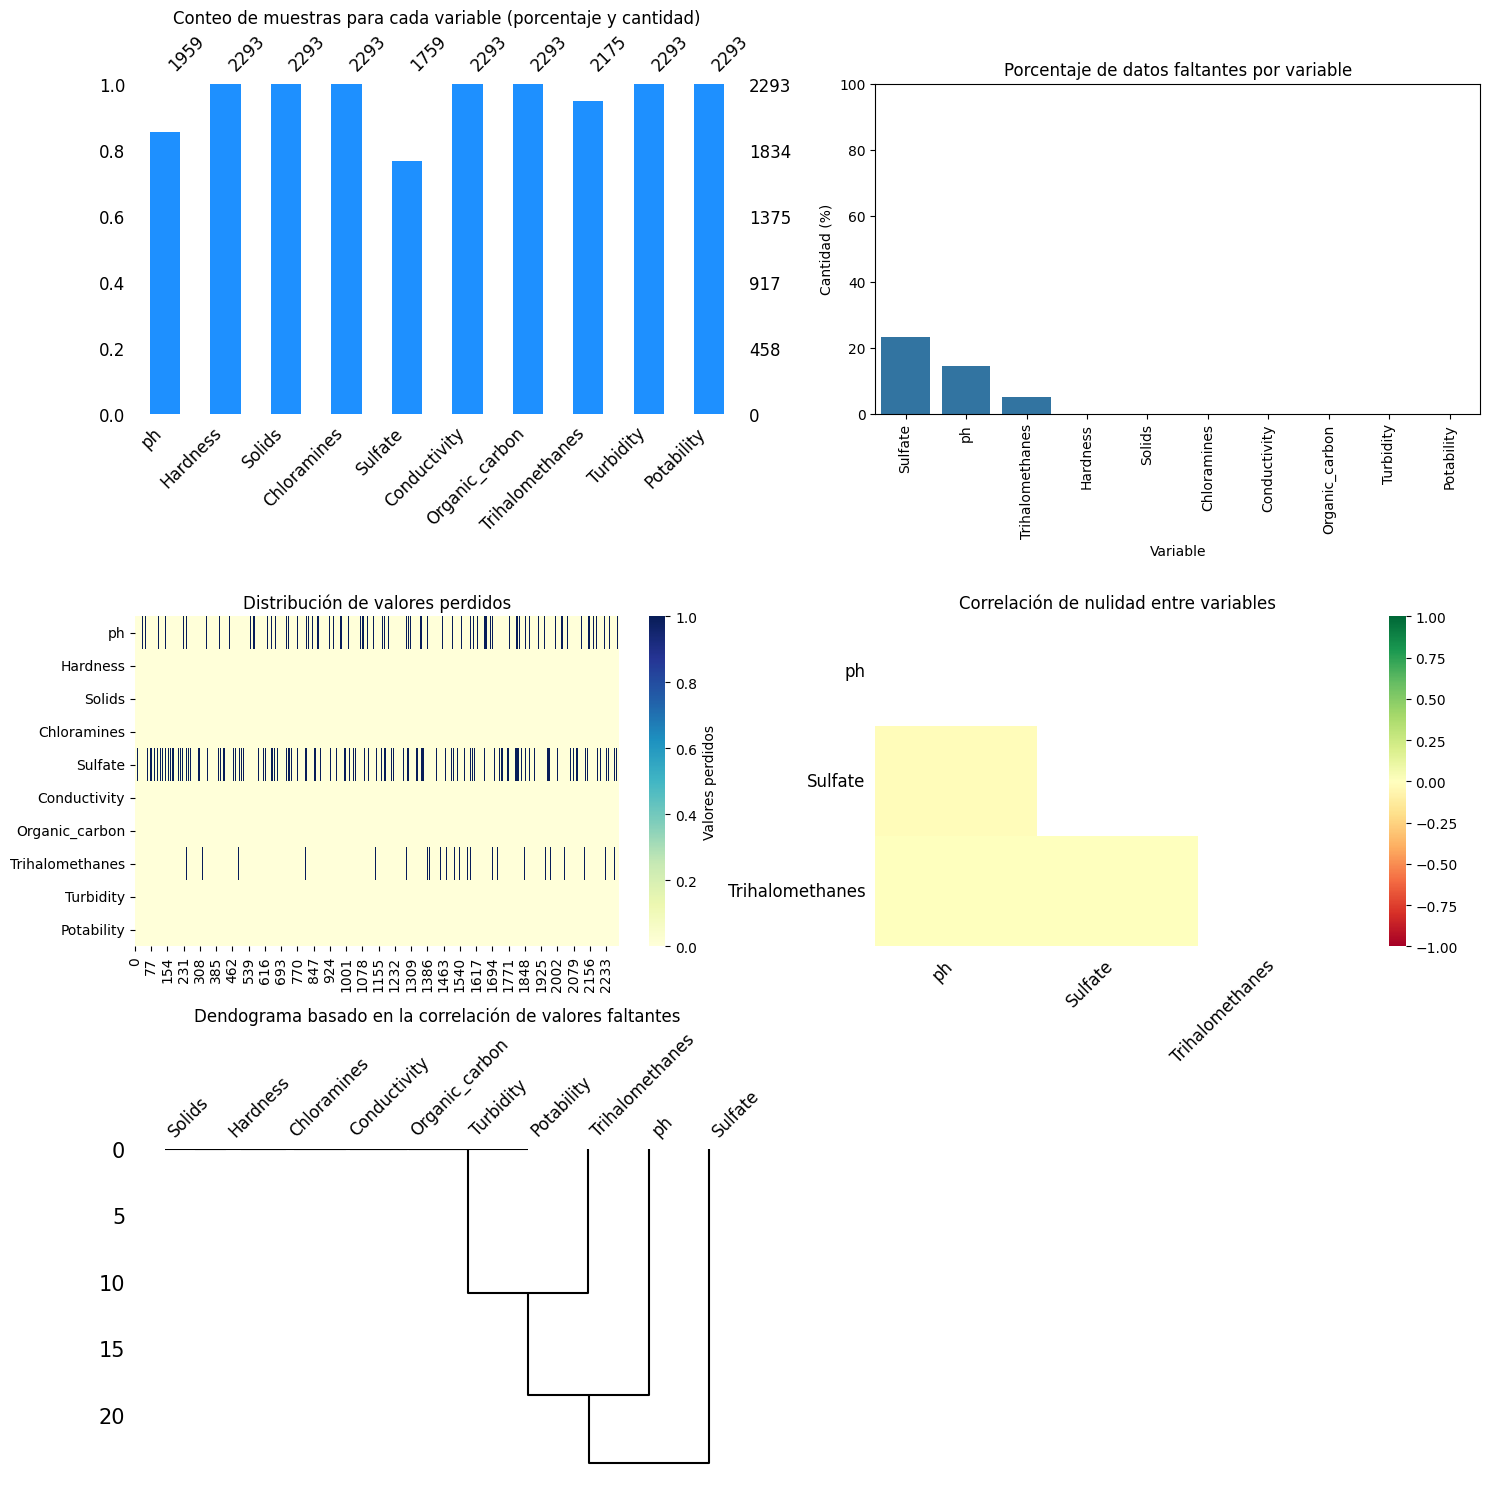

In [ ]:
report_missings(df_train)

<Axes: >

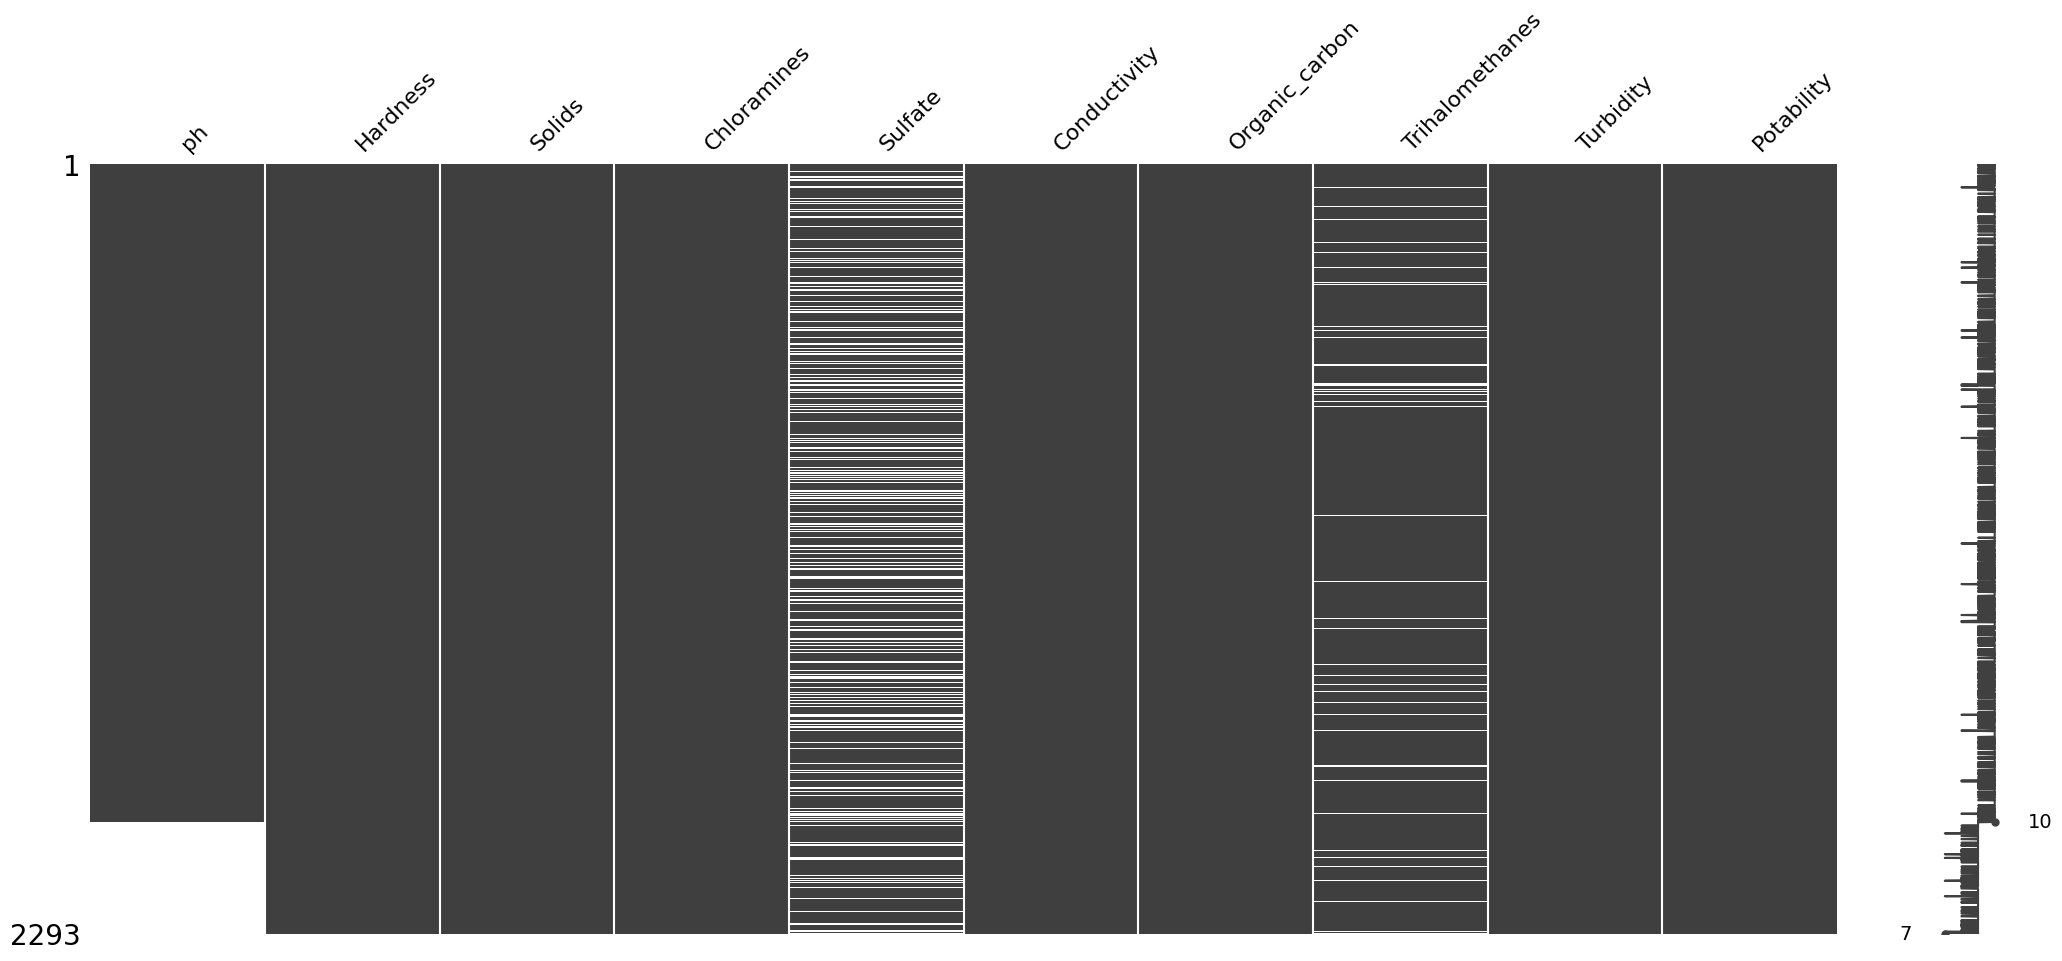

In [ ]:
missingno.matrix(df_train.sort_values("ph"))

Los datos faltantes no tienen correlación y son al azar.

In [ ]:
na_variables = df_train.columns[df.isnull().any()].tolist()
na_variables

['ph', 'Sulfate', 'Trihalomethanes']

In [ ]:
def show_distr(df):
  print("missing values : \n{}".format(df.isna().sum()))
  boxplot = df.boxplot(column=na_variables)
  hist = df[na_variables].hist(bins=20)
  print("\n -------------------------")

missing values : 
ph                 334
Sulfate            534
Trihalomethanes    118
dtype: int64

 -------------------------


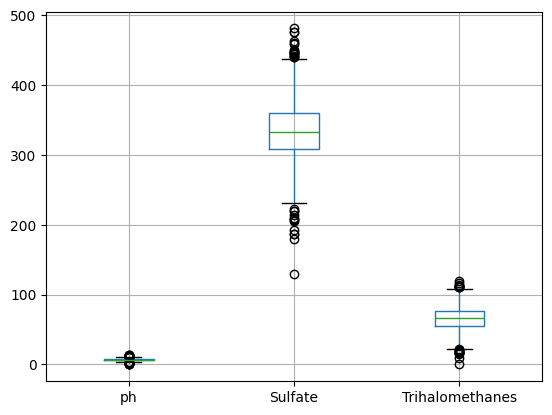

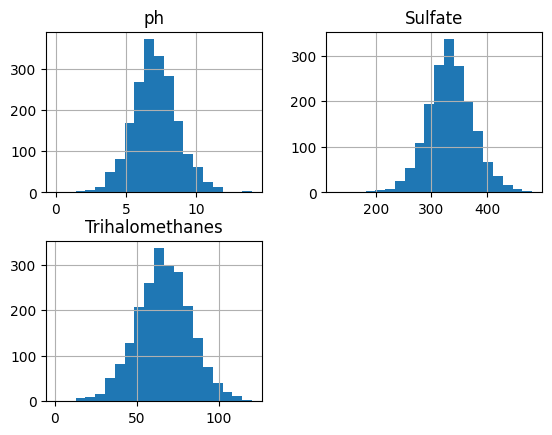

In [ ]:
show_distr(df_train[na_variables])

### Imputación con mediana

In [ ]:
# Rellenar valores faltantes con la mediana de cada columna
df_filled_mediana = df_train.fillna(df_train.median())

# Mostrar el DataFrame actualizado
df_filled_mediana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2293 non-null   float64
 1   Hardness         2293 non-null   float64
 2   Solids           2293 non-null   float64
 3   Chloramines      2293 non-null   float64
 4   Sulfate          2293 non-null   float64
 5   Conductivity     2293 non-null   float64
 6   Organic_carbon   2293 non-null   float64
 7   Trihalomethanes  2293 non-null   float64
 8   Turbidity        2293 non-null   float64
 9   Potability       2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


missing values : 
ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64

 -------------------------


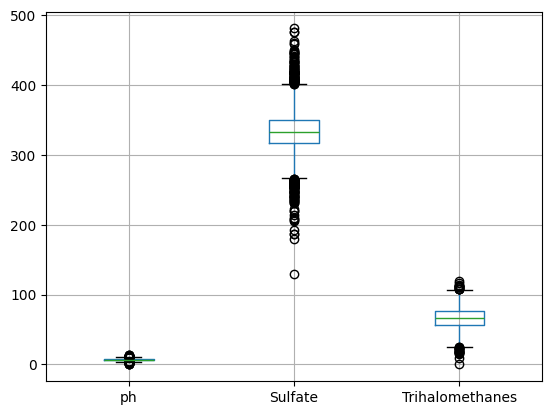

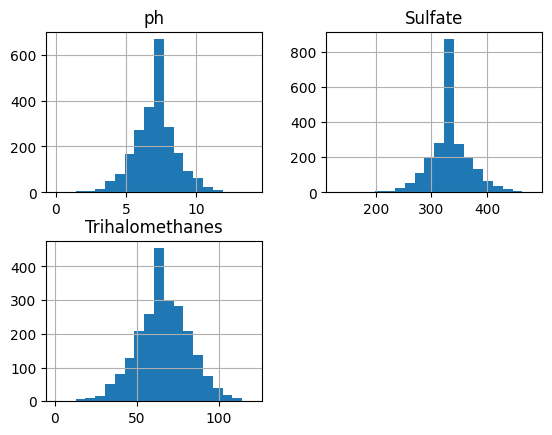

In [ ]:
show_distr(df_filled_mediana[na_variables])

### Imputación con Iterative Imputer

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Copy the data
df_ii_missing = df_train[na_variables].copy(deep=True)

# Init
ii_imp = IterativeImputer(
    estimator=ExtraTreesRegressor(), max_iter=10, random_state=123, verbose=3
)

# Tranform
df_ii_missing.loc[:, :] = ii_imp.fit_transform(df_ii_missing)

[IterativeImputer] Completing matrix with shape (2293, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.13
[IterativeImputer] Change: 75.9886791960513, scaled tolerance: 0.48103064230599724 
[IterativeImputer] Ending imputation round 2/10, elapsed time 2.29
[IterativeImputer] Change: 103.8396391646346, scaled tolerance: 0.48103064230599724 
[IterativeImputer] Ending imputation round 3/10, elapsed time 3.45
[IterativeImputer] Change: 89.97226178923297, scaled tolerance: 0.48103064230599724 
[IterativeImputer] Ending imputation round 4/10, elapsed time 4.58
[IterativeImputer] Change: 91.67908439448462, scaled tolerance: 0.48103064230599724 
[IterativeImputer] Ending imputation round 5/10, elapsed time 5.77
[IterativeImputer] Change: 75.78381929289186, scaled tolerance: 0.48103064230599724 
[IterativeImputer] Ending imputation round 6/10, elapsed time 6.94
[IterativeImputer] Change: 89.57240909732278, scaled tolerance: 0.48103064230599724 
[IterativeImputer] Ending imput

missing values : 
ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64

 -------------------------


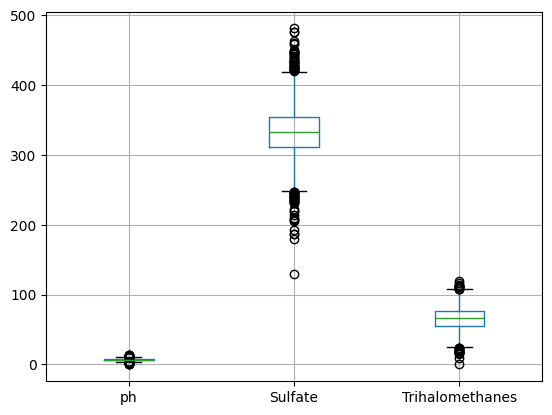

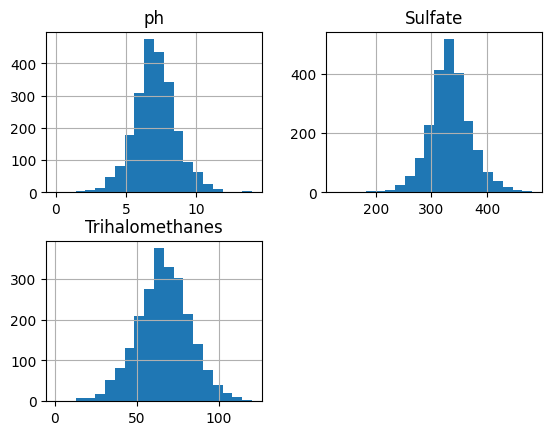

In [ ]:
show_distr(df_ii_missing)

In [ ]:
# Eliminar las columnas originales
df_filled_ii = df_train.drop(columns=na_variables)

# Añadir las columnas imputadas
df_filled_ii = pd.concat([df_filled_ii, df_ii_missing], axis=1)
df_filled_ii = df_filled_ii.reset_index(drop=True)
df_filled_ii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hardness         2293 non-null   float64
 1   Solids           2293 non-null   float64
 2   Chloramines      2293 non-null   float64
 3   Conductivity     2293 non-null   float64
 4   Organic_carbon   2293 non-null   float64
 5   Turbidity        2293 non-null   float64
 6   Potability       2293 non-null   int64  
 7   ph               2293 non-null   float64
 8   Sulfate          2293 non-null   float64
 9   Trihalomethanes  2293 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


### Imputación con KNN

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Copiar las columnas con valores faltantes
df_knn_missing = df_train[na_variables].copy(deep=True)

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_knn_missing)

# Inicializar el KNNImputer
#knn_imp = KNNImputer(n_neighbors=5, weights="uniform", metric="nan_euclidean")
knn_imp = KNNImputer(n_neighbors=10, weights="uniform")

# Imputar valores faltantes en los datos escalados
df_imputed_scaled = knn_imp.fit_transform(df_scaled)

# Revertir la estandarización para volver a la escala original
df_imputed_original = scaler.inverse_transform(df_imputed_scaled)

# Convertir de nuevo a DataFrame
df_knn_missing.loc[:, :] = df_imputed_original

missing values : 
ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64

 -------------------------


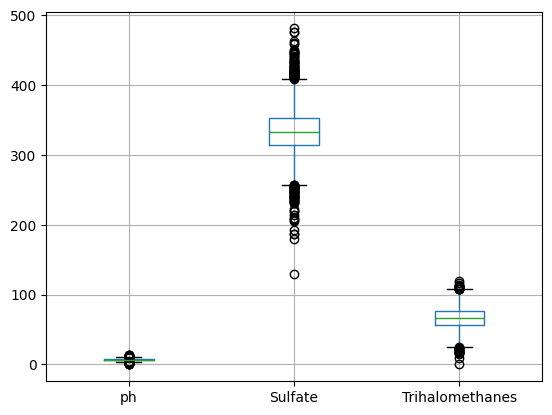

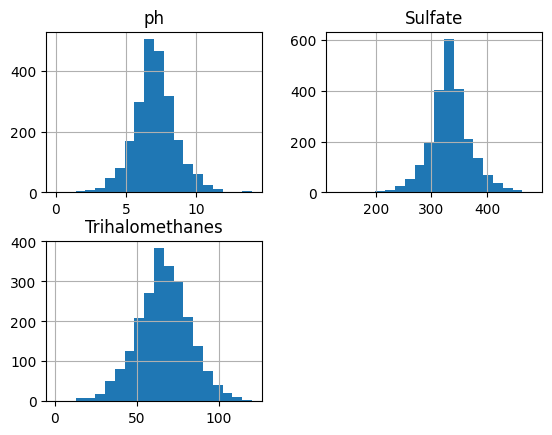

In [ ]:
show_distr(df_knn_missing)

In [ ]:
# Eliminar las columnas originales
df_filled_knn = df_train.drop(columns=na_variables)

# Añadir las columnas imputadas
df_filled_knn = pd.concat([df_filled_knn, df_knn_missing], axis=1)
df_filled_knn = df_filled_knn.reset_index(drop=True)
df_filled_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hardness         2293 non-null   float64
 1   Solids           2293 non-null   float64
 2   Chloramines      2293 non-null   float64
 3   Conductivity     2293 non-null   float64
 4   Organic_carbon   2293 non-null   float64
 5   Turbidity        2293 non-null   float64
 6   Potability       2293 non-null   int64  
 7   ph               2293 non-null   float64
 8   Sulfate          2293 non-null   float64
 9   Trihalomethanes  2293 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


## Tratamiento de Outliers

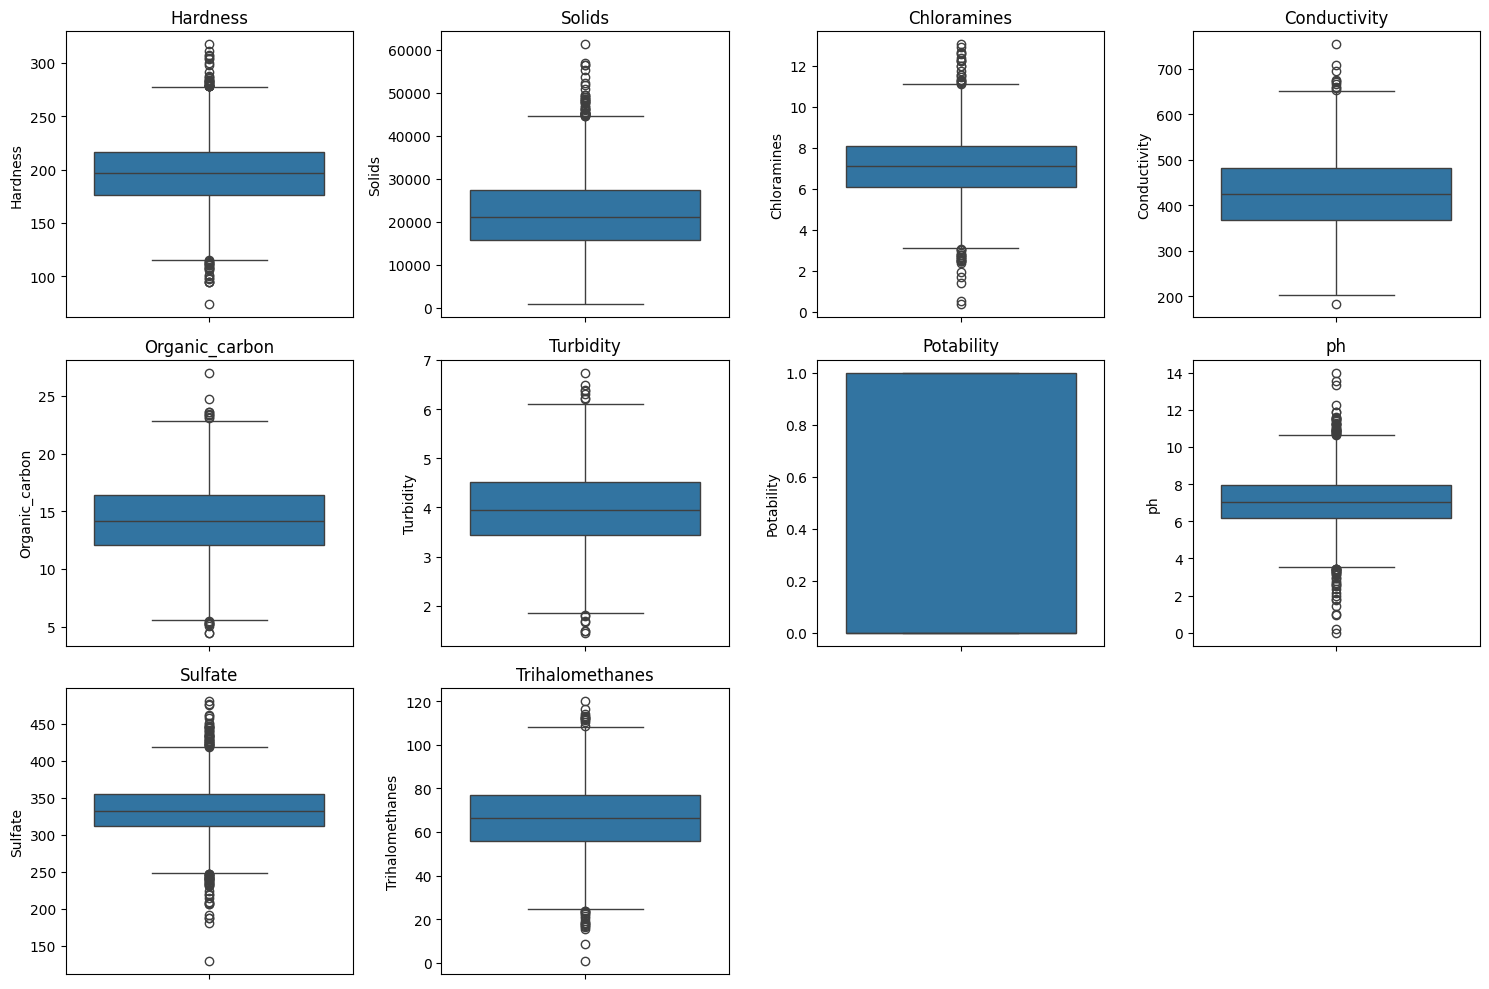

In [ ]:
# prompt: graficos boxplot para variables de un dataframe

# Create boxplots for all numerical variables in df_train
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_filled_ii.select_dtypes(include=np.number).columns):
    plt.subplot(3, 4, i + 1)  # Adjust the layout as needed
    sns.boxplot(y=df_filled_ii[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=3df23d5b01687b91ec5194bac21593748f656cbc6941de83d8aa85d74917c57d
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [ ]:
from pyod.models.abod import ABOD
from sklearn.ensemble import IsolationForest
from pyod.models.hbos import HBOS

### Luego de imputación con mediana

In [ ]:
# Análisis RIC
df_tmp = df_filled_mediana.copy()
cols = df_tmp.columns #
Q1 = df_tmp[cols].quantile(0.25)
Q3 = df_tmp[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df_tmp[cols] < (Q1 - 1.5 * IQR)) | (df_tmp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
filtered_df_train = df_tmp[condition]
filtered_df_train.shape

(1866, 10)

In [ ]:
# ABOD
filtered_df_train = df_filled_mediana.copy()

clf = ABOD(contamination=0.1)
clf.fit(filtered_df_train)
y_pred_m_train = clf.predict(filtered_df_train)
filtered_df_train[y_pred_m_train == 0].shape

(2025, 10)

In [ ]:
# Isolation Forest
filtered_df_train = df_filled_mediana.copy()

clf = IsolationForest(contamination=0.1, random_state=42)  # contamination=proporción de outliers esperados
clf.fit(filtered_df_train)
y_pred_m_train = clf.predict(filtered_df_train)
filtered_df_train[y_pred_m_train == 1].shape

(2063, 10)

In [ ]:
# HBOS
filtered_df_train = df_filled_mediana.copy()

clf = HBOS(contamination=0.1)
clf.fit(filtered_df_train)
y_pred_m_train = clf.predict(filtered_df_train)

filtered_df_train[y_pred_m_train == 0].shape

(2063, 10)

### Luego de imputación Iterative Imputer


In [ ]:
# Análisis RIC
df_tmp = df_filled_ii.copy()
cols = df_tmp.columns #
Q1 = df_tmp[cols].quantile(0.25)
Q3 = df_tmp[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df_tmp[cols] < (Q1 - 1.5 * IQR)) | (df_tmp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
filtered_df_train = df_tmp[condition]
filtered_df_train.shape

(1993, 10)

In [ ]:
# ABOD
filtered_df_train = df_filled_ii.copy()

clf = ABOD(contamination=0.1)
clf.fit(filtered_df_train)
y_pred_m_train = clf.predict(filtered_df_train)
filtered_df_train[y_pred_m_train == 0].shape

(2021, 10)

In [ ]:
# Isolation Forest
filtered_df_train = df_filled_ii.copy()

clf = IsolationForest(contamination=0.1, random_state=42)  # contamination=proporción de outliers esperados
clf.fit(filtered_df_train)
y_pred_m_train = clf.predict(filtered_df_train)
filtered_df_train[y_pred_m_train == 1].shape

(2063, 10)

In [ ]:
# HBOS
filtered_df_train = df_filled_ii.copy()

clf = HBOS(contamination=0.1)
clf.fit(filtered_df_train)
y_pred_m_train = clf.predict(filtered_df_train)

filtered_df_train[y_pred_m_train == 0].shape

(2063, 10)

### Luego de imputación KNN

In [ ]:
# Análisis RIC
df_tmp = df_filled_knn.copy()
cols = df_tmp.columns
Q1 = df_tmp[cols].quantile(0.25)
Q3 = df_tmp[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df_tmp[cols] < (Q1 - 1.5 * IQR)) | (df_tmp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
filtered_df_train = df_tmp[condition]
filtered_df_train.shape

(1930, 10)

In [ ]:
# ABOD
filtered_df_train = df_filled_knn.copy()

clf = ABOD(contamination=0.1)
clf.fit(filtered_df_train)
y_pred_m_train = clf.predict(filtered_df_train)
filtered_df_train[y_pred_m_train == 0].shape

(2037, 10)

In [ ]:
# Isolation Forest
filtered_df_train = df_filled_knn.copy()

clf = IsolationForest(contamination=0.1, random_state=42)  # contamination=proporción de outliers esperados
clf.fit(filtered_df_train)
y_pred_m_train = clf.predict(filtered_df_train)
filtered_df_train[y_pred_m_train == 1].shape

(2063, 10)

In [ ]:
# HBOS
filtered_df_train = df_filled_knn.copy()

clf = HBOS(contamination=0.1)
clf.fit(filtered_df_train)
y_pred_m_train = clf.predict(filtered_df_train)

filtered_df_train[y_pred_m_train == 0].shape

(2063, 10)

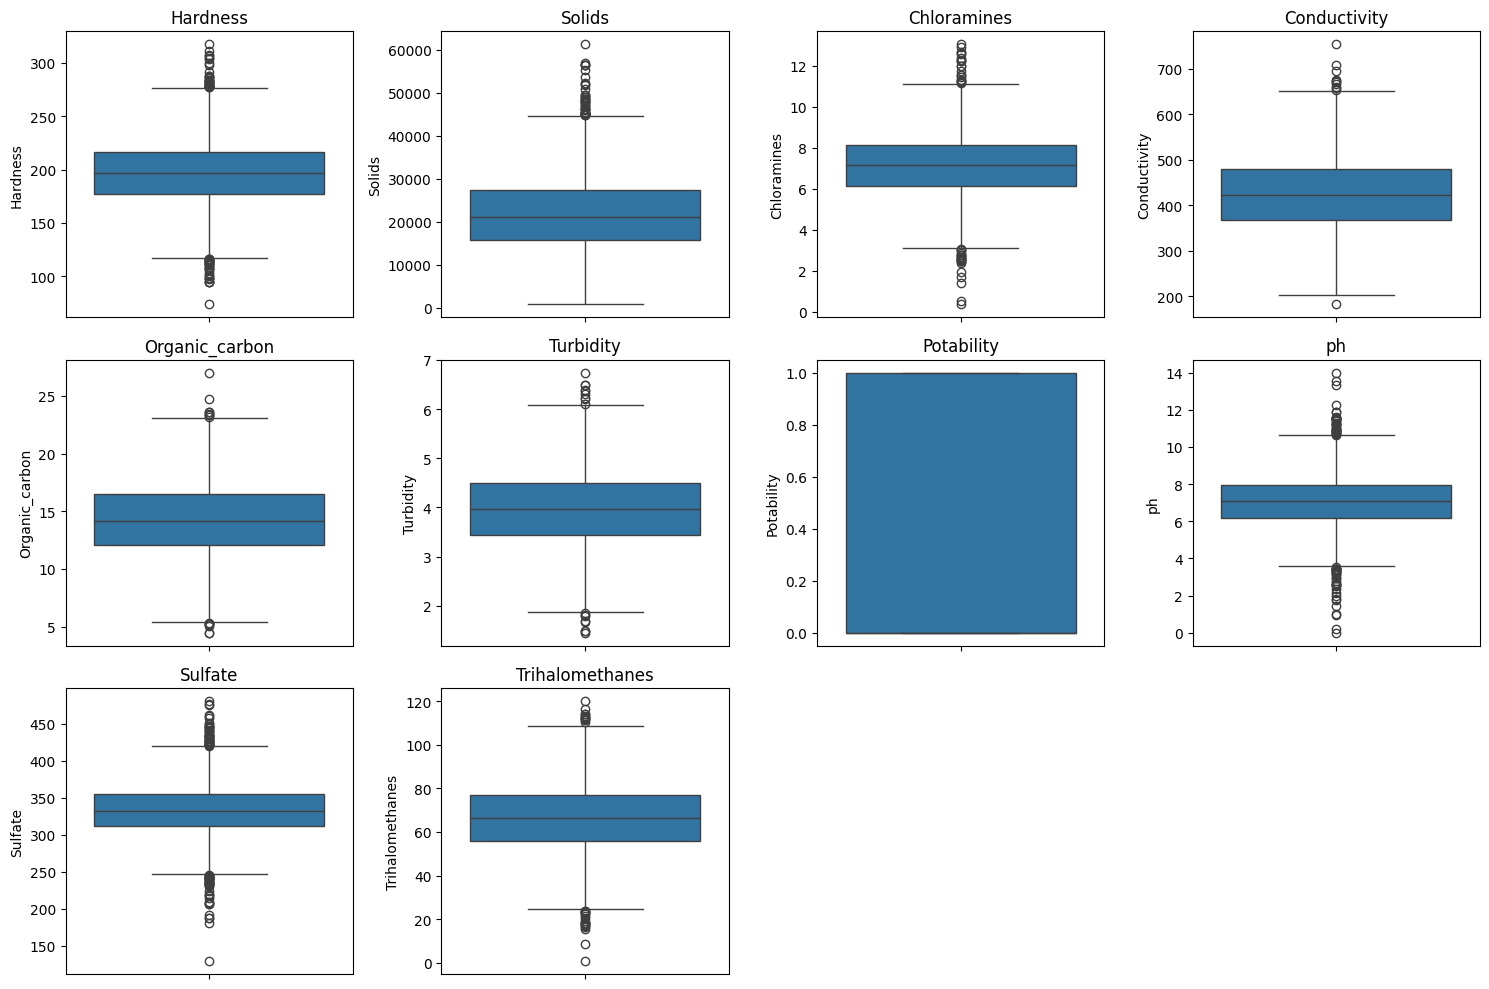

In [ ]:
# prompt: graficos boxplot para variables de un dataframe

# Create boxplots for all numerical variables in df_train
plt.figure(figsize=(15, 10))
for i, col in enumerate(filtered_df_train.select_dtypes(include=np.number).columns):
    plt.subplot(3, 4, i + 1)  # Adjust the layout as needed
    sns.boxplot(y=filtered_df_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

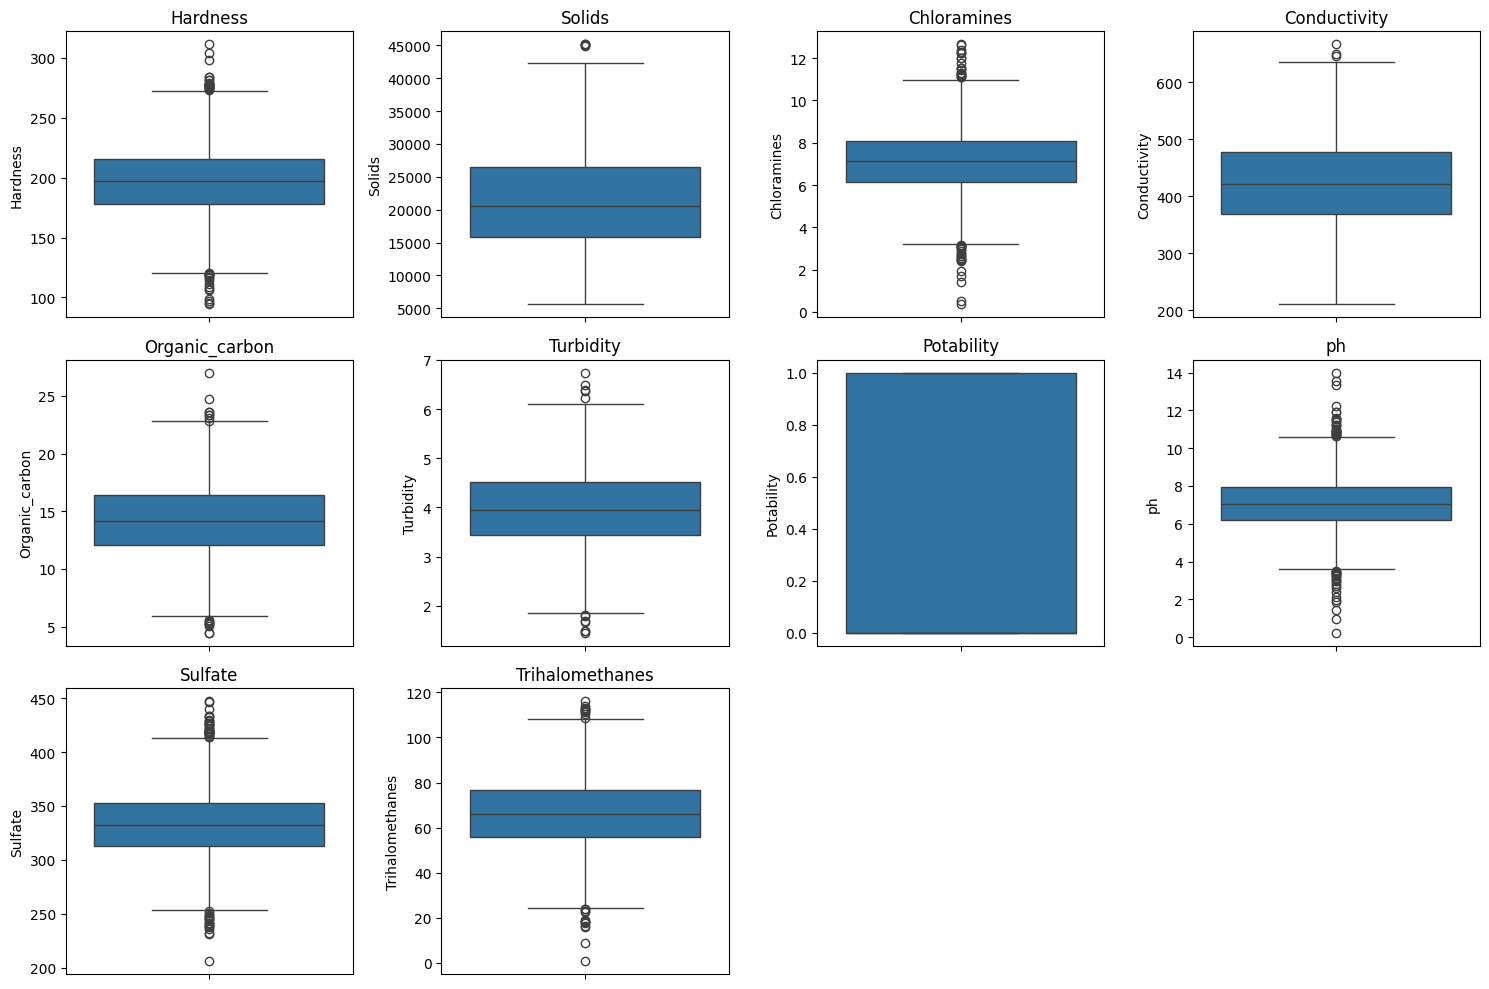

In [ ]:
# prompt: graficos boxplot para variables de un dataframe

# Create boxplots for all numerical variables in df_train
plt.figure(figsize=(15, 10))
for i, col in enumerate(filtered_df_train[y_pred_m_train == 0].select_dtypes(include=np.number).columns):
    plt.subplot(3, 4, i + 1)  # Adjust the layout as needed
    sns.boxplot(y=filtered_df_train[y_pred_m_train == 0][col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Preparación de data test

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               826 non-null    float64
 1   Hardness         983 non-null    float64
 2   Solids           983 non-null    float64
 3   Chloramines      983 non-null    float64
 4   Sulfate          736 non-null    float64
 5   Conductivity     983 non-null    float64
 6   Organic_carbon   983 non-null    float64
 7   Trihalomethanes  939 non-null    float64
 8   Turbidity        983 non-null    float64
 9   Potability       983 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 76.9 KB


## Imputación con mediana

In [ ]:
# Rellenar valores faltantes con la mediana de cada columna
df_filled_mediana_test = df_test.fillna(df_test.median())

# Mostrar el DataFrame actualizado
df_filled_mediana_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               983 non-null    float64
 1   Hardness         983 non-null    float64
 2   Solids           983 non-null    float64
 3   Chloramines      983 non-null    float64
 4   Sulfate          983 non-null    float64
 5   Conductivity     983 non-null    float64
 6   Organic_carbon   983 non-null    float64
 7   Trihalomethanes  983 non-null    float64
 8   Turbidity        983 non-null    float64
 9   Potability       983 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 76.9 KB


## Imputación con Iterative Imputer

In [ ]:
# Copy the data
df_ii_missing_test = df_test[na_variables].copy(deep=True)

# Tranform
df_ii_missing_test.loc[:, :] = ii_imp.fit_transform(df_ii_missing_test)

# Copy the data
#df_ii_missing_test = df_test[na_variables].copy(deep=True)

#df_ii_missing_test.loc[:, :] = ii_imp.fit_transform(df_test)

[IterativeImputer] Completing matrix with shape (983, 3)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.58
[IterativeImputer] Change: 71.63544930938599, scaled tolerance: 0.4554512337131526 
[IterativeImputer] Ending imputation round 2/10, elapsed time 1.16
[IterativeImputer] Change: 83.66320399016428, scaled tolerance: 0.4554512337131526 
[IterativeImputer] Ending imputation round 3/10, elapsed time 2.08
[IterativeImputer] Change: 87.68790837204966, scaled tolerance: 0.4554512337131526 
[IterativeImputer] Ending imputation round 4/10, elapsed time 2.99
[IterativeImputer] Change: 112.11516745342794, scaled tolerance: 0.4554512337131526 
[IterativeImputer] Ending imputation round 5/10, elapsed time 3.94
[IterativeImputer] Change: 83.42958411287226, scaled tolerance: 0.4554512337131526 
[IterativeImputer] Ending imputation round 6/10, elapsed time 4.87
[IterativeImputer] Change: 69.0332645390875, scaled tolerance: 0.4554512337131526 
[IterativeImputer] Ending imputation 

In [ ]:
# Eliminar las columnas originales
df_filled_ii_test = df_test.drop(columns=na_variables)

# Añadir las columnas imputadas
df_filled_ii_test = pd.concat([df_filled_ii_test, df_ii_missing_test], axis=1)
df_filled_ii_test = df_filled_ii_test.reset_index(drop=True)

df_filled_ii_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hardness         983 non-null    float64
 1   Solids           983 non-null    float64
 2   Chloramines      983 non-null    float64
 3   Conductivity     983 non-null    float64
 4   Organic_carbon   983 non-null    float64
 5   Turbidity        983 non-null    float64
 6   Potability       983 non-null    int64  
 7   ph               983 non-null    float64
 8   Sulfate          983 non-null    float64
 9   Trihalomethanes  983 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 76.9 KB


## Imputación con KNN

In [ ]:
# Copiar las columnas con valores faltantes del conjunto de prueba
df_knn_missing_test = df_test[na_variables].copy(deep=True)

# Estandarizar los datos del conjunto de prueba
scaler = StandardScaler()
df_scaled_test = scaler.fit_transform(df_knn_missing_test)

# Imputar valores faltantes en los datos escalados del conjunto de prueba
df_imputed_scaled_test = knn_imp.fit_transform(df_scaled_test)

# Revertir la estandarización para volver a la escala original en el conjunto de prueba
df_imputed_original_test = scaler.inverse_transform(df_imputed_scaled_test)

# Actualizar el DataFrame de prueba imputado
df_knn_missing_test.loc[:, :] = df_imputed_original_test

In [ ]:
# Eliminar las columnas originales
df_filled_knn_test = df_test.drop(columns=na_variables)

# Añadir las columnas imputadas
df_filled_knn_test = pd.concat([df_filled_knn_test, df_knn_missing_test], axis=1)
df_filled_knn_test = df_filled_knn_test.reset_index(drop=True)
df_filled_knn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hardness         983 non-null    float64
 1   Solids           983 non-null    float64
 2   Chloramines      983 non-null    float64
 3   Conductivity     983 non-null    float64
 4   Organic_carbon   983 non-null    float64
 5   Turbidity        983 non-null    float64
 6   Potability       983 non-null    int64  
 7   ph               983 non-null    float64
 8   Sulfate          983 non-null    float64
 9   Trihalomethanes  983 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 76.9 KB


## Tratamiento de Outliers

### Luego de imputación con mediana

In [ ]:
# Análisis RIC
df_tmp_test = df_filled_mediana_test.copy()
cols = df_tmp_test.columns #
Q1 = df_tmp_test[cols].quantile(0.25)
Q3 = df_tmp_test[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df_tmp_test[cols] < (Q1 - 1.5 * IQR)) | (df_tmp_test[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
filtered_df_test = df_tmp_test[condition]
filtered_df_test.shape

(814, 10)

In [ ]:
# Método ABOD
filtered_df_test = df_filled_mediana_test.copy()

y_pred_m_test = clf.predict(filtered_df_test)
filtered_df_test[y_pred_m_test == 0].shape

(883, 10)

In [ ]:
# Isolation Forest
filtered_df_test = df_filled_mediana_test.copy()

y_pred_m_test = clf.predict(filtered_df_test)
filtered_df_test[y_pred_m_test == 1].shape

(900, 10)

In [ ]:
# HBOS
filtered_df_test = df_filled_mediana_test.copy()

y_pred_m_test = clf.predict(filtered_df_test)
filtered_df_test[y_pred_m_test == 0].shape

(898, 10)

### Luego de imputación con Iterative Imputer

In [ ]:
# Análisis RIC
df_tmp_test = df_filled_ii_test.copy()
cols = df_tmp_test.columns #
Q1 = df_tmp_test[cols].quantile(0.25)
Q3 = df_tmp_test[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df_tmp_test[cols] < (Q1 - 1.5 * IQR)) | (df_tmp_test[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
filtered_df_test = df_tmp_test[condition]
filtered_df_test.shape

(874, 10)

In [ ]:
# Método ABOD
filtered_df_test = df_filled_ii_test.copy()

y_pred_m_test = clf.predict(filtered_df_test)
filtered_df_test[y_pred_m_test == 0].shape

(885, 10)

In [ ]:
# Isolation Forest
filtered_df_test = df_filled_ii_test.copy()

y_pred_m_test = clf.predict(filtered_df_test)
filtered_df_test[y_pred_m_test == 1].shape

(893, 10)

In [ ]:
# HBOS
filtered_df_test = df_filled_ii_test.copy()

y_pred_m_test = clf.predict(filtered_df_test)
filtered_df_test[y_pred_m_test == 0].shape

(897, 10)

### Luego de imputación con KNN

In [ ]:
# Análisis RIC
df_tmp_test = df_filled_knn_test.copy()
cols = df_tmp_test.columns #
Q1 = df_tmp_test[cols].quantile(0.25)
Q3 = df_tmp_test[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df_tmp_test[cols] < (Q1 - 1.5 * IQR)) | (df_tmp_test[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
filtered_df_test = df_tmp_test[condition]
filtered_df_test.shape

(838, 10)

In [ ]:
# Método ABOD
filtered_df_test = df_filled_knn_test.copy()

y_pred_m_test = clf.predict(filtered_df_test)
filtered_df_test[y_pred_m_test == 0].shape

(882, 10)

In [ ]:
# Isolation Forest
filtered_df_test = df_filled_knn_test.copy()

y_pred_m_test = clf.predict(filtered_df_test)
filtered_df_test[y_pred_m_test == 1].shape

(891, 10)

In [ ]:
# HBOS
filtered_df_test = df_filled_knn_test.copy()

y_pred_m_test = clf.predict(filtered_df_test)
filtered_df_test[y_pred_m_test == 0].shape

(896, 10)

# Entrenamiento del modelo

## Analizando correlación de variables

In [ ]:
tab_s = filtered_df_train[y_pred_m_train == 0].corr(numeric_only=True,method='pearson')
tab_s

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability,ph,Sulfate,Trihalomethanes
Hardness,1.000000,-0.038994,-0.025919,-0.017203,-0.000940,-0.028932,-0.010599,0.090876,-0.080358,-0.033311
Solids,-0.038994,1.000000,-0.066451,0.007815,0.008229,0.013657,0.012367,-0.109972,-0.153323,-0.008020
Chloramines,-0.025919,-0.066451,1.000000,-0.024095,-0.022439,0.000367,0.042582,-0.082952,0.041344,0.013561
Conductivity,-0.017203,0.007815,-0.024095,1.000000,0.027086,0.022997,-0.006142,0.015591,-0.016666,-0.009072
Organic_carbon,-0.000940,0.008229,-0.022439,0.027086,1.000000,-0.006248,-0.014578,0.018790,0.014281,-0.027585
Turbidity,-0.028932,0.013657,0.000367,0.022997,-0.006248,1.000000,-0.007272,-0.041122,0.028957,-0.024430
Potability,-0.010599,0.012367,0.042582,-0.006142,-0.014578,-0.007272,1.000000,0.008426,0.015712,0.040636
ph,0.090876,-0.109972,-0.082952,0.015591,0.018790,-0.041122,0.008426,1.000000,0.029983,-0.004096
Sulfate,-0.080358,-0.153323,0.041344,-0.016666,0.014281,0.028957,0.015712,0.029983,1.000000,-0.022519
Trihalomethanes,-0.033311,-0.008020,0.013561,-0.009072,-0.027585,-0.024430,0.040636,-0.004096,-0.022519,1.000000


In [ ]:
import statsmodels.api as sm

In [ ]:
def r2_polynomial(x, y, degree=2):
    # Crear la matriz de diseño para el modelo polinómico
    X = np.column_stack([x**i for i in range(degree + 1)])  # Generar términos x^0, x^1, ..., x^degree
    model = sm.OLS(y, X).fit()  # Ajusta el modelo OLS
    return model.rsquared  # Retorna el R^2

In [ ]:
def analyze_relationships(df, target_variable, max_degree=2):
    # Inicializar un DataFrame para los resultados
    results = pd.DataFrame(index=df.columns.difference([target_variable]), columns=range(1, max_degree + 1))

    # Calcular el R^2 para cada variable independiente
    for col in results.index:
        for degree in range(1, max_degree + 1):
            r2_value = r2_polynomial(df[col], df[target_variable], degree)
            results.loc[col, degree] = r2_value

    return results

In [ ]:
analyze_relationships(filtered_df_train[y_pred_m_train == 0],'Potability',5)

,1,2,3,4,5
Chloramines,0.001813,0.002566,0.002718,0.00275,0.003658
Conductivity,0.000038,0.000107,0.000321,0.00075,0.000685
Hardness,0.000112,0.006364,0.006407,0.006816,0.006819
Organic_carbon,0.000213,0.000851,0.000965,0.00097,0.001072
Solids,0.000153,0.001348,0.001474,-0.003932,-0.105044
Sulfate,0.000247,0.021383,0.021389,0.022707,0.022729
Trihalomethanes,0.001651,0.001655,0.001739,0.001777,0.001828
Turbidity,0.000053,0.004101,0.004528,0.004583,0.004602
ph,0.000071,0.014437,0.014751,0.015381,0.015593


## Variables de entrenamiento y test

In [ ]:
# Sin tratamiento de outliers
X_train_post = df_filled_ii.drop('Potability', axis=1)
X_test_post = df_filled_ii_test.drop('Potability', axis=1)
y_train_post = df_filled_ii['Potability']
y_test_post= df_filled_ii_test['Potability']

In [ ]:
# Para tratamiento de outliers con análisis RIC
X_train_post = filtered_df_train.drop('Potability', axis=1)
X_test_post = filtered_df_test.drop('Potability', axis=1)
y_train_post = filtered_df_train['Potability']
y_test_post= filtered_df_test['Potability']

In [ ]:
# Para tratamiento de outliers con ABOD y HBOS
X_train_post_m = filtered_df_train[y_pred_m_train == 0].drop('Potability', axis=1)
X_test_post_m = filtered_df_test[y_pred_m_test == 0].drop('Potability', axis=1)
y_train_post_m = filtered_df_train[y_pred_m_train == 0]['Potability']
y_test_post_m = filtered_df_test[y_pred_m_test == 0]['Potability']

In [ ]:
# Para tratamiento de outliers con Isolation Forest
X_train_post_m = filtered_df_train[y_pred_m_train == 1].drop('Potability', axis=1)
X_test_post_m = filtered_df_test[y_pred_m_test == 1].drop('Potability', axis=1)
y_train_post_m = filtered_df_train[y_pred_m_train == 1]['Potability']
y_test_post_m = filtered_df_test[y_pred_m_test == 1]['Potability']

## Eliminación de variables con baja varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.5)
X_train_tr = vt.fit_transform(X_train_post_m)
print(f"Tamaño de X original {X_train_post_m.shape}")
print(f"Tamaño de X transformado {X_train_tr.shape}")

Tamaño de X original (2063, 9)
Tamaño de X transformado (2063, 9)


No se elimina ninguna variable.

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(0.9)
X_train_tr = pca.fit_transform(X_train_post_m)

In [ ]:
X_test_tr = pca.transform(X_test_post_m)

## Oversampling a la base de datos de entrenamiento

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

In [ ]:
sm = SMOTE()
#X_train_r, y_train_r = sm.fit_resample(X_train_post, y_train_post)
X_train_r, y_train_r = sm.fit_resample(X_train_post_m, y_train_post_m)
#X_train_r, y_train_r = sm.fit_resample(X_train_tr, y_train_post_m)

In [ ]:
sm = SMOTETomek()
#X_train_r, y_train_r = sm.fit_resample(X_train_post, y_train_post)
X_train_r, y_train_r = sm.fit_resample(X_train_post_m, y_train_post_m)

In [ ]:
sm = ADASYN()
#X_train_r, y_train_r = sm.fit_resample(X_train_post, y_train_post)
X_train_r, y_train_r = sm.fit_resample(X_train_post_m, y_train_post_m)
#X_train_r, y_train_r = sm.fit_resample(X_train_tr, y_train_post_m)

## Entrenamiento de modelos

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

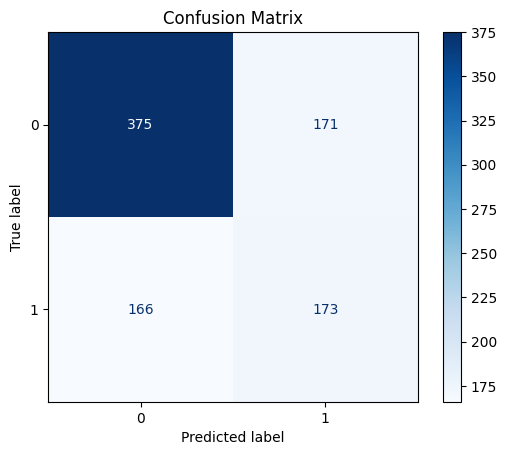

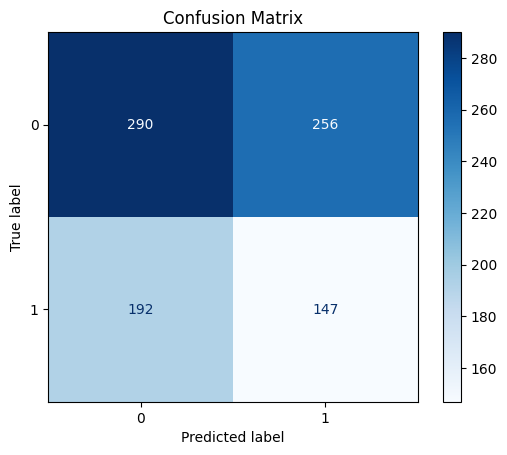

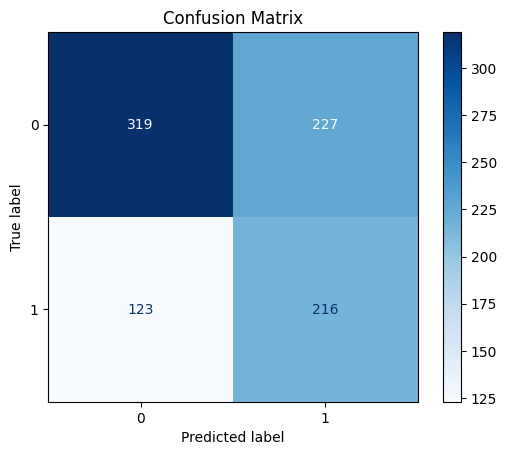

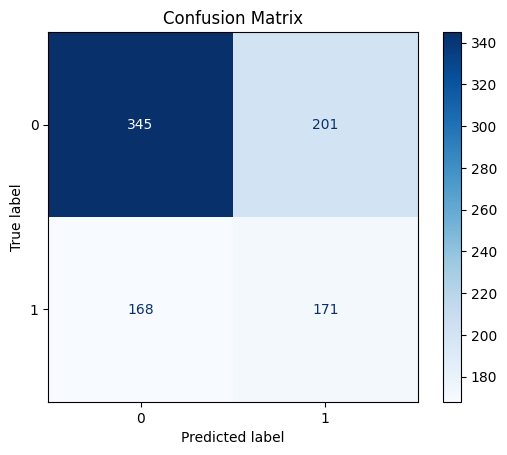

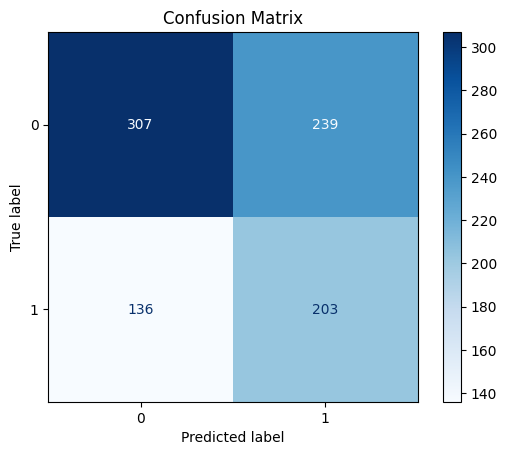

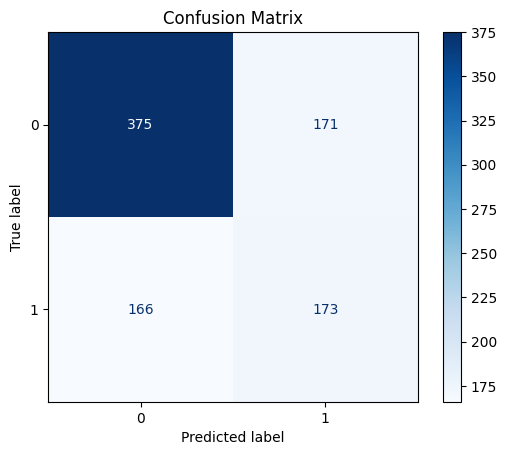

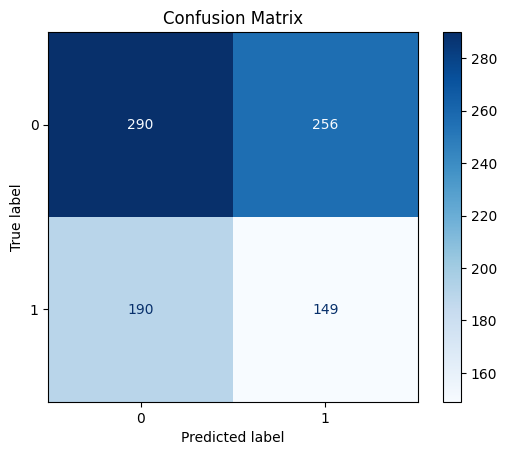

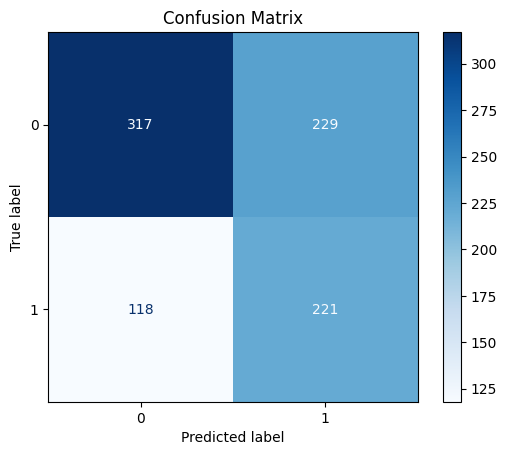

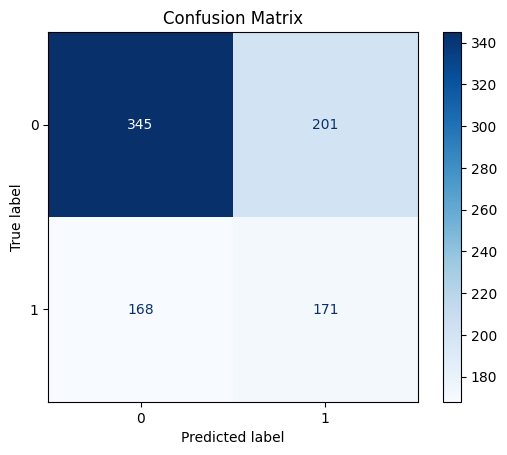

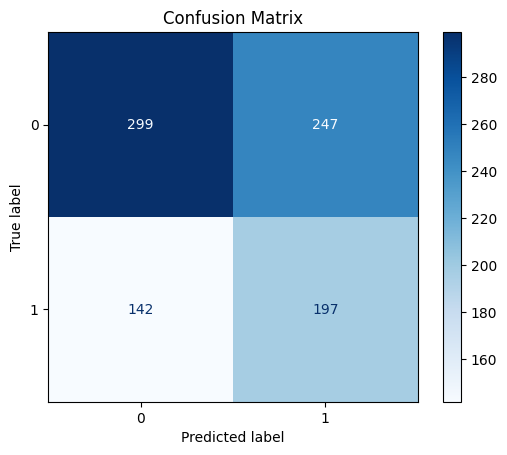

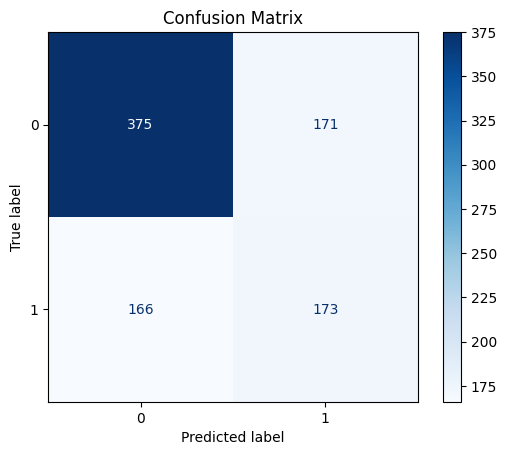

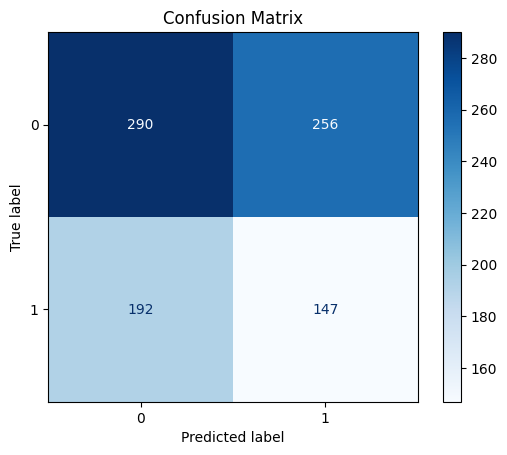

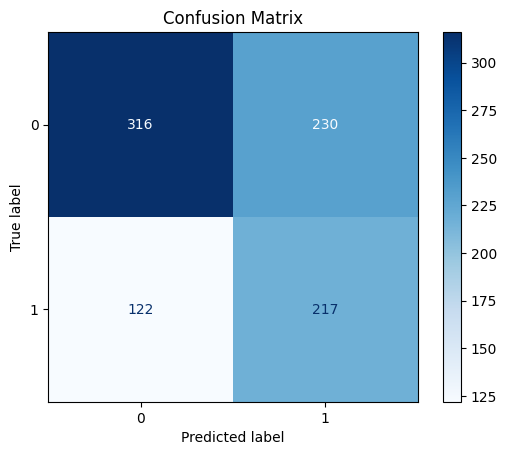

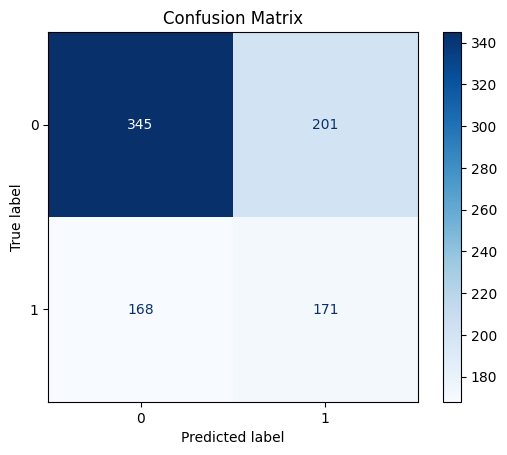

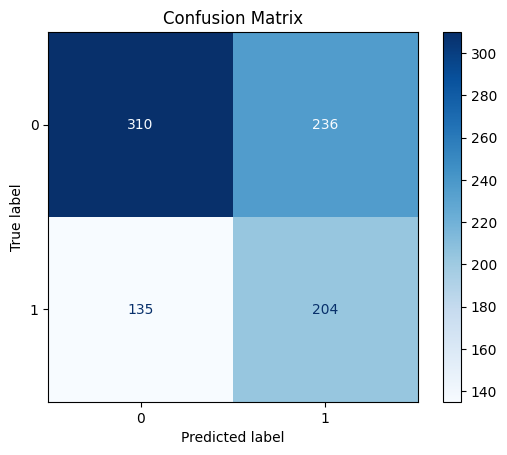

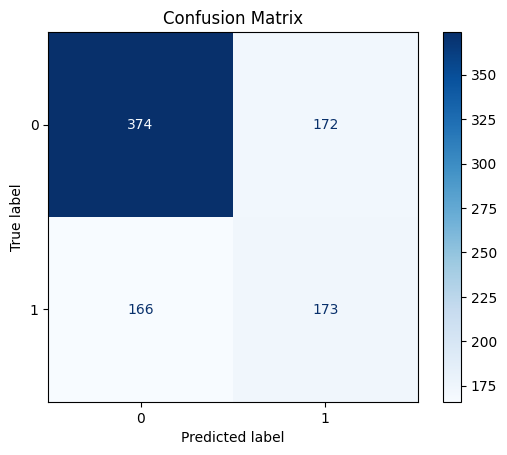

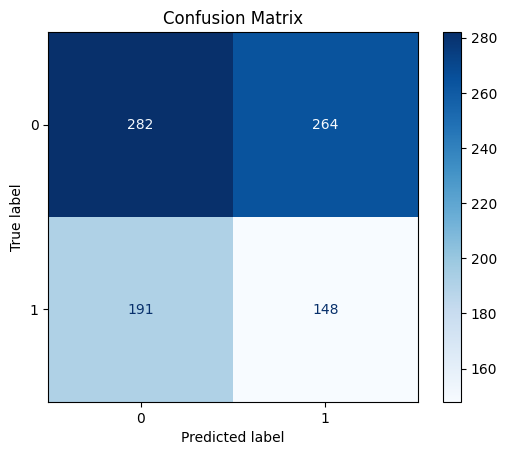

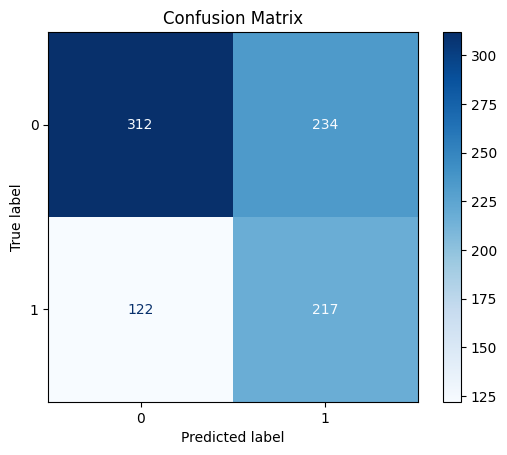

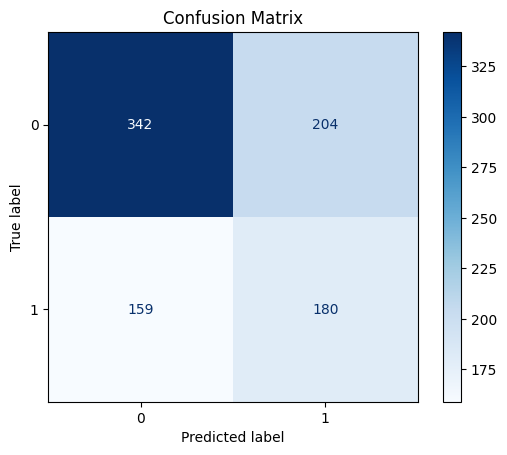

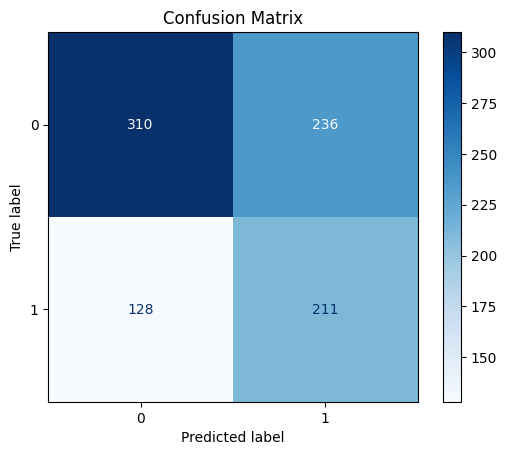

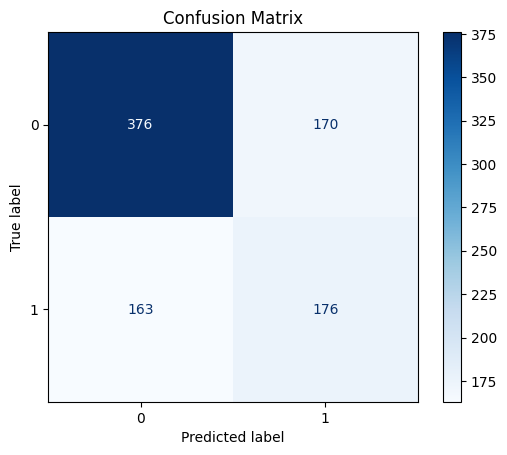

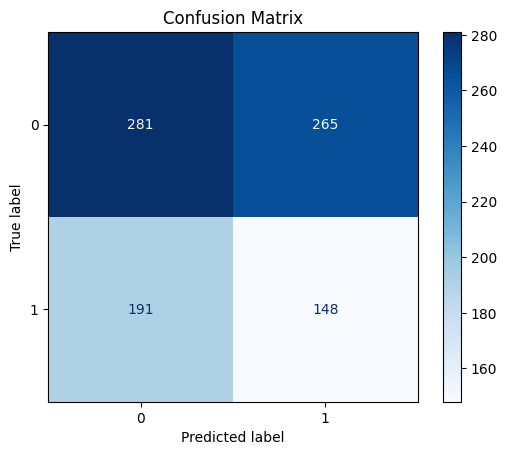

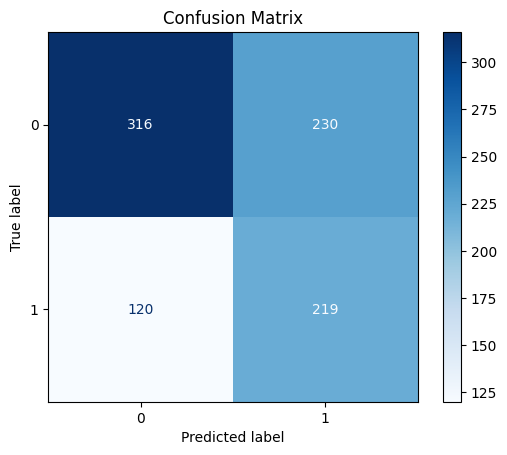

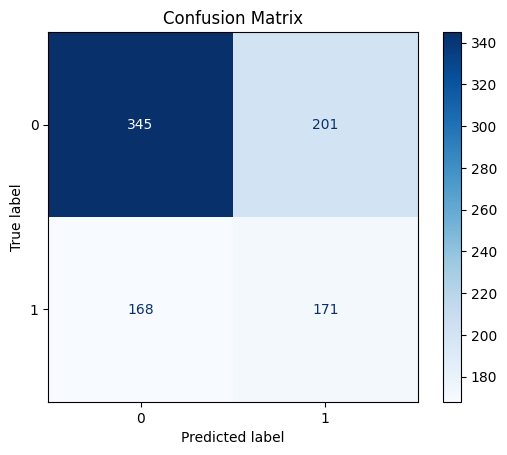

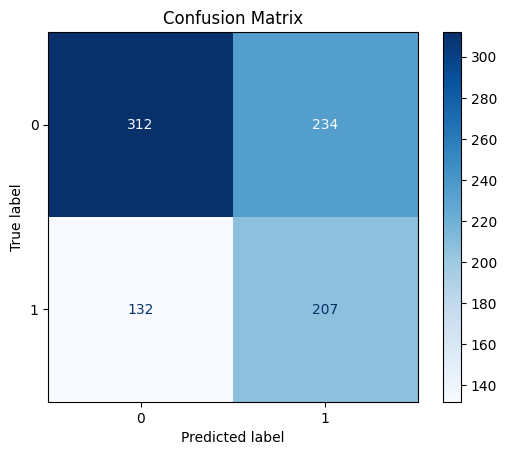

                 Scaler               Model  CV Accuracy  Test Accuracy  \
20     PowerTransformer        RandomForest     0.700398       0.623729   
7          MinMaxScaler                 SVM     0.623506       0.607910   
22     PowerTransformer                 SVM     0.640637       0.604520   
2        StandardScaler                 SVM     0.640637       0.604520   
0        StandardScaler        RandomForest     0.700000       0.619209   
10         RobustScaler        RandomForest     0.700000       0.619209   
5          MinMaxScaler        RandomForest     0.698008       0.619209   
15  QuantileTransformer        RandomForest     0.697610       0.618079   
12         RobustScaler                 SVM     0.641036       0.602260   
17  QuantileTransformer                 SVM     0.637052       0.597740   
19  QuantileTransformer                 KNN     0.626693       0.588701   
24     PowerTransformer                 KNN     0.634263       0.586441   
18  QuantileTransformer  

In [ ]:
# Escaladores a probar
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(output_distribution='normal', random_state=42),
    "PowerTransformer": PowerTransformer(method='yeo-johnson')
    #"PowerTransformer": PowerTransformer(method='box-cox')
}

# Definir modelos
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'),
    "SVM": SVC(random_state=42, class_weight='balanced', kernel='rbf'),
    "XGBoost": XGBClassifier(random_state=0, max_depth = 5),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Evaluar cada combinación de escalador y modelo
results = []

for scaler_name, scaler in scalers.items():
    for model_name, model in models.items():
        try:
            # Crear pipeline
            pipeline = Pipeline([
                ("scaler", scaler),
                ("model", model),
            ])

            # Validación cruzada en datos de entrenamiento
            scores = cross_val_score(pipeline, X_train_r, y_train_r, cv=5, scoring="accuracy")
            mean_cv_score = np.mean(scores)

            # Entrenar en todo el conjunto de entrenamiento
            pipeline.fit(X_train_r, y_train_r)

            # Evaluar en conjunto de prueba
            y_pred = pipeline.predict(X_test_post_m)
            test_accuracy = accuracy_score(y_test_post_m, y_pred)

            # Generar la matriz de confusión
            conf_matrix = confusion_matrix(y_test_post_m, y_pred)

            # Visualizar la matriz de confusión
            disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
            disp.plot(cmap="Blues", values_format="d")
            plt.title("Confusion Matrix")
            plt.show()

            # Generar classification report como diccionario
            report_dict = classification_report(y_test_post_m, y_pred, target_names=["Clase 0", "Clase 1"], output_dict=True)

            # Acceder a métricas específicas
            precision_clase_0 = report_dict["Clase 0"]["precision"]
            precision_clase_1 = report_dict["Clase 1"]["precision"]
            recall_clase_0 = report_dict["Clase 0"]["recall"]
            recall_clase_1 = report_dict["Clase 1"]["recall"]
            f1_macro = report_dict["macro avg"]["f1-score"]

            # Almacenar resultados
            results.append({
                "Scaler": scaler_name,
                "Model": model_name,
                "CV Accuracy": mean_cv_score,
                "Test Accuracy": test_accuracy,
                "Precision Clase 0:": precision_clase_0,
                "Precision Clase 1:": precision_clase_1,
                "Recall Clase 0:": recall_clase_0,
                "Recall Clase 1:": recall_clase_1,
                "F1-Score Macro Average:": f1_macro,
            })
        except Exception as e:
            print(f"Error con {scaler_name} y {model_name}: {e}")



# Convertir resultados a un DataFrame
results_df = pd.DataFrame(results)

# Mostrar los resultados ordenados
print(results_df.sort_values(by="F1-Score Macro Average:", ascending=False))